# testing bias correction code

to start with I copied a file to my home directory to experiment with, and then made a copy of that again so that I had an original and a preprocessed version (incase fsl modifies the original file, which I am not sure about).

In [7]:
import subprocess
import os
import numpy as np
import matplotlib.pyplot as plt
from twaidata.MRI_preprep.io import load_nii_img

In [3]:
infile = "/home/s2208943/MSS3_ED_001_V1_T1Wbrain.nii.gz"

In [4]:
FSLDIR = os.getenv('FSLDIR')
print("fsl: ", FSLDIR)
if FSLDIR == "" or FSLDIR == None:
    raise ValueError("FSL is not installed. Install FSL to complete bias correction")
if os.getenv('FSLOUTPUTTYPE') != 'NIFTI_GZ':
    raise ValueError("FSL output type must be configured to NIFTI_GZ")

fsl:  /home/s2208943/fsl


In [5]:
bias_field_corr_command = [os.path.join(*[FSLDIR,'bin', 'fast']), '-b', '-B', infile]
_ = subprocess.call(bias_field_corr_command)

In [6]:
relevant_files = [f for f in os.listdir("/home/s2208943/") if "MSS3_ED_001" in f]

In [8]:
relevant_imgs = [load_nii_img("/home/s2208943/" + f)[0] for f in relevant_files]

In [13]:
for name, img in zip(relevant_files, relevant_imgs):
    print(f"{name.split('.')[0]}, {img.sum():.2}")

MSS3_ED_001_V1_T1Wbrain_pve_0, 4.8e+05
MSS3_ED_001_V1_T1Wbrain, 2.4e+08
MSS3_ED_001_V1_T1Wbrain_pve_2, 7.7e+05
MSS3_ED_001_V1_T1Wbrain_pve_1, 7e+05
MSS3_ED_001_V1_T1Wbrain_COPY, 2.4e+08
MSS3_ED_001_V1_T1Wbrain_seg, 4.2e+06
MSS3_ED_001_V1_T1Wbrain_pveseg, 4.2e+06
MSS3_ED_001_V1_T1Wbrain_restore, 2.3e+08
MSS3_ED_001_V1_T1Wbrain_mixeltype, 4.1e+06
MSS3_ED_001_V1_T1Wbrain_bias, 1.2e+07


In [16]:
img.shape

(256, 256, 176)

MSS3_ED_001_V1_T1Wbrain_pve_0.nii.gz


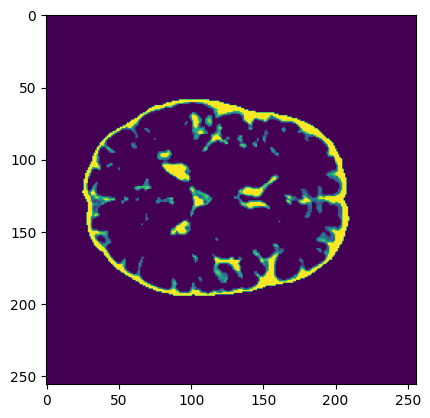

MSS3_ED_001_V1_T1Wbrain.nii.gz


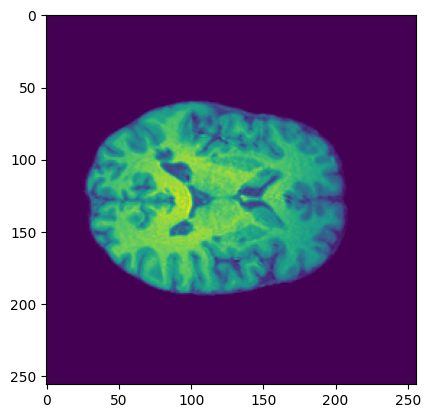

MSS3_ED_001_V1_T1Wbrain_pve_2.nii.gz


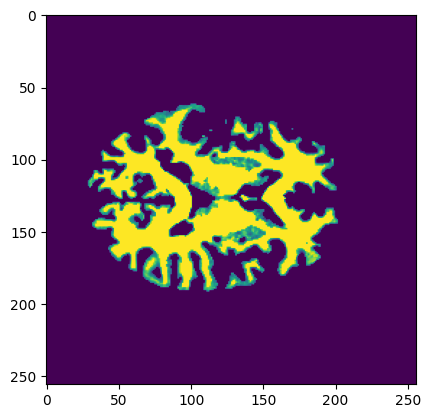

MSS3_ED_001_V1_T1Wbrain_pve_1.nii.gz


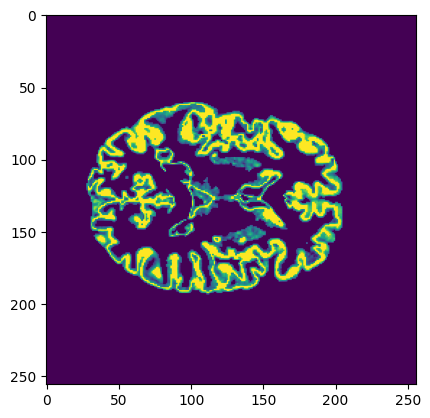

MSS3_ED_001_V1_T1Wbrain_COPY.nii.gz


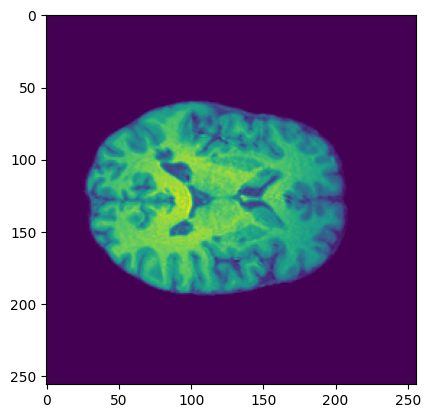

MSS3_ED_001_V1_T1Wbrain_seg.nii.gz


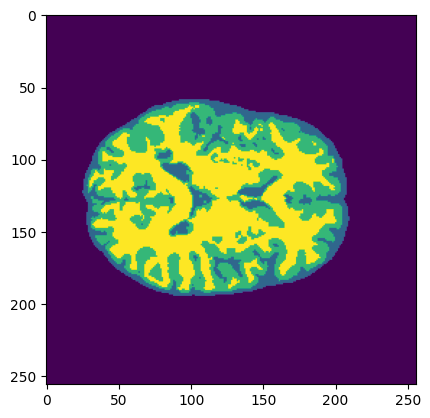

MSS3_ED_001_V1_T1Wbrain_pveseg.nii.gz


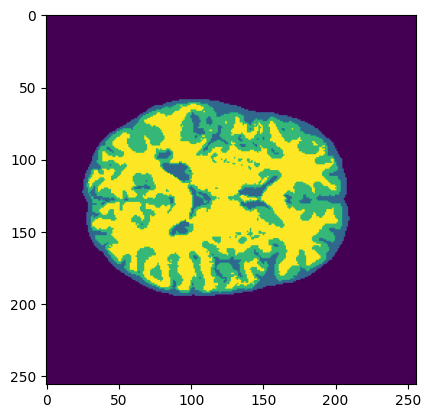

MSS3_ED_001_V1_T1Wbrain_restore.nii.gz


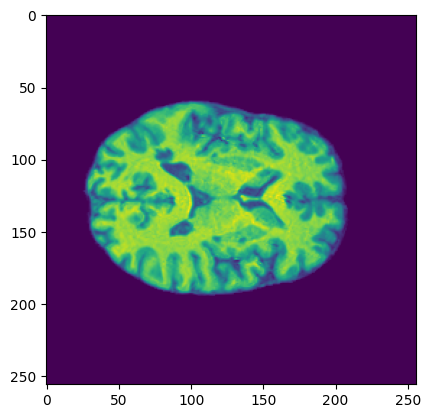

MSS3_ED_001_V1_T1Wbrain_mixeltype.nii.gz


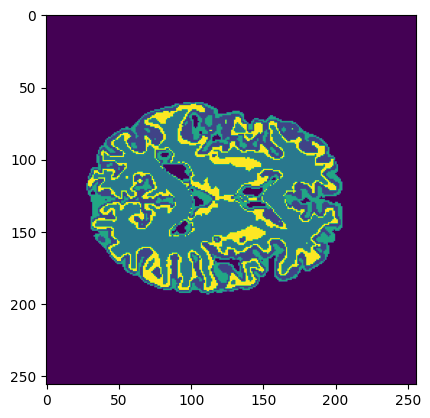

MSS3_ED_001_V1_T1Wbrain_bias.nii.gz


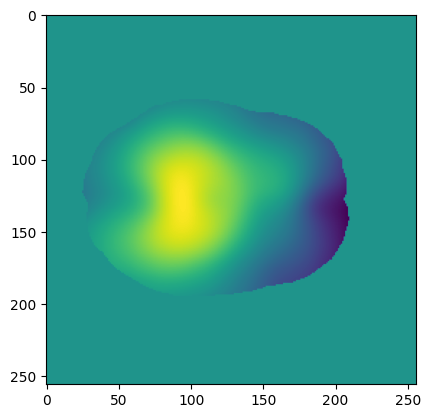

In [17]:
for name, img in zip(relevant_files, relevant_imgs):
    print(name)
    plt.imshow(img[:,:,90])
    plt.show()